# Music Recommender
### Group – Music Recommender
### Team Member - Amit Singh [10465317]

In [1]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 198 kB 54.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=840f83a2ce98026095e4977bb07ff5753760fa753f919ea03f848b58cde4aa3a
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


### Generate ouput.txt file containing userID, trackID, albumID, artistID, genreID (21 genre)

In [2]:
import numpy as np

dataDir='./data/'
file_name_test=dataDir + 'testTrack_hierarchy.txt'
file_name_train=dataDir + 'trainIdx2_matrix.txt'
output_file=dataDir + 'output22.txt'

fTest= open(file_name_test, 'r')
fTrain=open(file_name_train, 'r')
Trainline= fTrain.readline()
fOut = open(output_file, 'w')

trackID_vec=[0]*6
albumID_vec=[0]*6
artistID_vec=[0]*6
genreID_vec=[]
genreLens=[]

lastUserID=-1

last_shape = (6,25)
user_rating_inTrain=np.zeros(last_shape)

arr_li = []
for line in fTest:
    arr_test=line.strip().split('|')
    arr_li.append(len(arr_test))
    userID= arr_test[0]
    trackID= arr_test[1]
    albumID= arr_test[2]
    artistID=arr_test[3]
    genreID = [0]*21

    for genre in range(4, len(arr_test)):
        genreID.append(int(arr_test[genre]))

    if userID != lastUserID:
        genreID_vec = []
        genreLens = []
        ii=0


    trackID_vec[ii]=trackID
    albumID_vec[ii]=albumID
    artistID_vec[ii]=artistID
    genreID_vec += genreID
    genreLens += [len(genreID)]

    ii=ii+1
    lastUserID=userID

    if ii==6 : 
        user_rating_inTrain=np.zeros(shape=(6,max(genreLens)+2))
        while(Trainline):
            arr_train = Trainline.strip().split('|')
            trainUserID=arr_train[0]
            trainItemID=arr_train[1]
            trainRating=arr_train[2]
            Trainline=fTrain.readline()
            gens = genreID_vec.copy()

            if trainUserID < userID:
                continue
            if trainUserID == userID:
                for nn in range(0, 6):
                    if trainItemID==albumID_vec[nn]:
                        user_rating_inTrain[nn, 0]=trainRating
                    if trainItemID==artistID_vec[nn]:
                        user_rating_inTrain[nn, 1]=trainRating
                    for genre_num in range(genreLens[nn]):
                        if int(trainItemID) == gens.pop(0):
                            user_rating_inTrain[nn, genre_num+2]=trainRating

            if trainUserID> userID:
                for nn in range(0, 6):
                    outStr=str(userID) + '|' + str(trackID_vec[nn])+ '|' + str(user_rating_inTrain[nn,0]) + '|' + str(user_rating_inTrain[nn, 1])
                    for genre_num in range(genreLens[nn]):
                        outStr += '|' + str(user_rating_inTrain[nn,genre_num+2])
                    fOut.write(outStr + '\n')
                break

fTest.close()
fTrain.close()

### Algorithms

1. Using Album, Artist, Genre [1-21] Ratings 
  - Using Album, Artist, Genre [1-21] Ratings with weights
  - Using Album, Artist, Genre [1-21] Ratings - Mean, Max, Sum

2. Matrix Factorization
3. Various Classification Methods
 - Logistic Regression
 - Decision Tree Classification
 - Random Forest Classification
 - Gradient Boosted Tree Classification
4. Ensemble

Method 1 : Using Album, Artist, Genre [1-21] Ratings 

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
output = pd.read_csv('./data/output21.txt', sep='|', header=None)
output.columns = ['User ID', 'Track ID', 'Album Rating', 'Artist Rating','Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10','Genre11', 'Genre12', 'Genre13', 'Genre14', 'Genre15', 'Genre16', 'Genre17', 'Genre18', 'Genre19', 'Genre20', 'Genre21']
output = output[['User ID', 'Track ID', 'Album Rating', 'Artist Rating','Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10','Genre11', 'Genre12', 'Genre13', 'Genre14', 'Genre15', 'Genre16', 'Genre17', 'Genre18', 'Genre19', 'Genre20', 'Genre21']]
output

,User ID,Track ID,Album Rating,Artist Rating,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,...,Genre12,Genre13,Genre14,Genre15,Genre16,Genre17,Genre18,Genre19,Genre20,Genre21
0,199810,208019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,199810,74139,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,199810,9903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,199810,242681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,199810,18515,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,249010,72192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119996,249010,86104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119997,249010,186634,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119998,249010,293818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.1 : Using Album, Artist, Genre [1-21] Ratings with weights
#### Sum (Artist * 0.8 + Album * 0.15 + Mean (Genre [1-22]) * 0.05)

In [4]:
# Sum (Artist * 0.8 + Album * 0.15 + Mean (Genre1-22) * 0.05)
output_2 = output.copy()
output_2['Genre Mean'] = output_2[['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10','Genre11', 'Genre12', 'Genre13', 'Genre14', 'Genre15', 'Genre16', 'Genre17', 'Genre18', 'Genre19', 'Genre20', 'Genre21']].mean(axis=1)
output_2['Album Rating'] = output_2['Album Rating'] * 0.8
output_2['Artist Rating'] = output_2['Artist Rating'] * 0.15
output_2['Genre Mean'] =  output_2['Genre Mean']  * 0.05
output_2['score'] = output_2[['Album Rating', 'Artist Rating','Genre Mean']].sum(axis=1)
output_2[['User ID', 'Track ID', 'score']]

,User ID,Track ID,score
0,199810,208019,0.000000
1,199810,74139,0.190476
2,199810,9903,0.000000
3,199810,242681,0.000000
4,199810,18515,10.500000
...,...,...,...
119995,249010,72192,0.000000
119996,249010,86104,0.000000
119997,249010,186634,85.500000
119998,249010,293818,0.000000


In [5]:
rating = output_2.copy()
rating['userid_trackid'] = rating['User ID'].astype(str) + '_' + rating['Track ID'].astype(str)
rating.drop(['Track ID','Album Rating', 'Artist Rating'],axis=1)
rating = rating[['User ID', 'userid_trackid', 'score']]
rating['rating'] = 0
rating = rating.sort_values(by = ['User ID', 'score'], ascending = [True, False])

users = rating['User ID'].unique()
df = pd.DataFrame()
for userId in users:
    frame_to_update = rating.loc[rating['User ID'] == userId]
    frame_to_update.head(3)['rating'] = 1
    df = df.append(frame_to_update, ignore_index = True)
rating_answer = rating[['userid_trackid', 'rating']]
rating_answer = rating_answer.rename(columns={'userid_trackid':'TrackID', 'rating':'Predictor'})
rating_answer.head(12)

,TrackID,Predictor
5,199810_105760,0
4,199810_18515,0
1,199810_74139,0
0,199810_208019,0
2,199810_9903,0
3,199810_242681,0
7,199812_142408,0
8,199812_130023,0
10,199812_223706,0
9,199812_29189,0


In [6]:
rating_answer.to_csv('./kaggle_submissions/Predictions_gmean_sum81505.csv', index=False)

##### 1.2 : Using Album, Artist, Genre [1-21] Ratings - Average

#####  Mean (Artist + Album + Genre [1-21] )

In [7]:
# Mean (Artist + Album + Genre1-21)
output_2 = output.copy()
output_2['score'] = output_2[['Album Rating', 'Artist Rating','Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10','Genre11', 'Genre12', 'Genre13', 'Genre14', 'Genre15', 'Genre16', 'Genre17', 'Genre18', 'Genre19', 'Genre20', 'Genre21']].mean(axis=1)
output_2[['User ID', 'Track ID', 'score']]

,User ID,Track ID,score
0,199810,208019,0.000000
1,199810,74139,3.478261
2,199810,9903,0.000000
3,199810,242681,0.000000
4,199810,18515,3.043478
...,...,...,...
119995,249010,72192,0.000000
119996,249010,86104,0.000000
119997,249010,186634,7.826087
119998,249010,293818,0.000000


In [8]:
rating = output_2.copy()
rating['userid_trackid'] = rating['User ID'].astype(str) + '_' + rating['Track ID'].astype(str)
rating.drop(['Track ID','Album Rating', 'Artist Rating'],axis=1)
rating = rating[['User ID', 'userid_trackid', 'score']]
rating['rating'] = 0
rating = rating.sort_values(by = ['User ID', 'score'], ascending = [True, False])

users = rating['User ID'].unique()
df = pd.DataFrame()
for userId in users:
    frame_to_update = rating.loc[rating['User ID'] == userId]
    frame_to_update.head(3)['rating'] = 1
    df = df.append(frame_to_update, ignore_index = True)
rating = df
rating_answer = rating[['userid_trackid', 'rating']]
rating_answer = rating_answer.rename(columns={'userid_trackid':'TrackID', 'rating':'Predictor'})
rating_answer

,TrackID,Predictor
0,199810_105760,1
1,199810_74139,1
2,199810_18515,1
3,199810_208019,0
4,199810_9903,0
...,...,...
119995,249010_186634,1
119996,249010_262811,1
119997,249010_72192,0
119998,249010_86104,0


In [9]:
rating_answer.to_csv('./kaggle_submissions/Predictions_mean.csv', index=False)

#### 1.3 : Using Album, Artist, Genre [1-21] Ratings - Sum

##### Sum (Artist + Album + Genre [1-21])

In [10]:
# Sum (Artist + Album + Genre1-22)
output_2 = output.copy()
output_2['score'] = output_2[['Album Rating', 'Artist Rating','Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10','Genre11', 'Genre12', 'Genre13', 'Genre14', 'Genre15', 'Genre16', 'Genre17', 'Genre18', 'Genre19', 'Genre20', 'Genre21']].sum(axis=1)
output_2[['User ID', 'Track ID', 'score']]

,User ID,Track ID,score
0,199810,208019,0.0
1,199810,74139,80.0
2,199810,9903,0.0
3,199810,242681,0.0
4,199810,18515,70.0
...,...,...,...
119995,249010,72192,0.0
119996,249010,86104,0.0
119997,249010,186634,180.0
119998,249010,293818,0.0


In [11]:
rating = output_2.copy()
rating['userid_trackid'] = rating['User ID'].astype(str) + '_' + rating['Track ID'].astype(str)
rating.drop(['Track ID','Album Rating', 'Artist Rating'],axis=1)
rating = rating[['User ID', 'userid_trackid', 'score']]
rating['rating'] = 0
rating = rating.sort_values(by = ['User ID', 'score'], ascending = [True, False])

users = rating['User ID'].unique()
df = pd.DataFrame()
for userId in users:
    frame_to_update = rating.loc[rating['User ID'] == userId]
    frame_to_update.head(3)['rating'] = 1
    df = df.append(frame_to_update, ignore_index = True)
rating = df
rating_answer = rating[['userid_trackid', 'rating']]
rating_answer = rating_answer.rename(columns={'userid_trackid':'TrackID', 'rating':'Predictor'})
rating_answer

,TrackID,Predictor
0,199810_105760,1
1,199810_74139,1
2,199810_18515,1
3,199810_208019,0
4,199810_9903,0
...,...,...
119995,249010_186634,1
119996,249010_262811,1
119997,249010_72192,0
119998,249010_86104,0


In [12]:
rating_answer.to_csv('./kaggle_submissions/Predictions_sum.csv', index=False)

#### 1.4 : Using Album, Artist, Genre [1-21] Ratings - Max

##### Max (Artist + Album + Genre1-22)

In [13]:
# Max (Artist + Album + Genre1-22)
output_2 = output.copy()
output_2['score'] = output_2[['Album Rating', 'Artist Rating','Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10','Genre11', 'Genre12', 'Genre13', 'Genre14', 'Genre15', 'Genre16', 'Genre17', 'Genre18', 'Genre19', 'Genre20', 'Genre21']].max(axis=1)
output_2[['User ID', 'Track ID', 'score']]

,User ID,Track ID,score
0,199810,208019,0.0
1,199810,74139,80.0
2,199810,9903,0.0
3,199810,242681,0.0
4,199810,18515,70.0
...,...,...,...
119995,249010,72192,0.0
119996,249010,86104,0.0
119997,249010,186634,90.0
119998,249010,293818,0.0


In [14]:
rating = output_2.copy()
rating['userid_trackid'] = rating['User ID'].astype(str) + '_' + rating['Track ID'].astype(str)
rating.drop(['Track ID','Album Rating', 'Artist Rating'],axis=1)
rating = rating[['User ID', 'userid_trackid', 'score']]
rating['rating'] = 0
rating = rating.sort_values(by = ['User ID', 'score'], ascending = [True, False])

users = rating['User ID'].unique()
df = pd.DataFrame()
for userId in users:
    frame_to_update = rating.loc[rating['User ID'] == userId]
    frame_to_update.head(3)['rating'] = 1
    df = df.append(frame_to_update, ignore_index = True)
rating = df
rating_answer = rating[['userid_trackid', 'rating']]
rating_answer = rating_answer.rename(columns={'userid_trackid':'TrackID', 'rating':'Predictor'})
rating_answer

,TrackID,Predictor
0,199810_105760,1
1,199810_74139,1
2,199810_18515,1
3,199810_208019,0
4,199810_9903,0
...,...,...
119995,249010_186634,1
119996,249010_262811,1
119997,249010_72192,0
119998,249010_86104,0


In [15]:
rating_answer.to_csv('kaggle_submissions/Predictions_max.csv', index=False)


#### 1.5 : Using Album, Artist, Genre [1-21] Ratings - Weighted Sum
#### Mean (Artist * 0.8 + Album * 0.15 + Sum (Genre1-22) * 0.05)



In [16]:
# Mean (Artist * 0.8 + Album * 0.15 + Sum (Genre1-22) * 0.05)
output['Genre Mean'] = output[['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10','Genre11', 'Genre12', 'Genre13', 'Genre14', 'Genre15', 'Genre16', 'Genre17', 'Genre18', 'Genre19', 'Genre20', 'Genre21']].sum(axis=1)
output['Album Rating'] = output['Album Rating'] * 0.8
output['Artist Rating'] = output['Artist Rating'] * 0.15
output['Genre Mean'] =  output['Genre Mean']  * 0.05
output['score'] = output[['Album Rating', 'Artist Rating','Genre Mean']].mean(axis=1)
output[['User ID', 'Track ID', 'score']]

,User ID,Track ID,score
0,199810,208019,0.000000
1,199810,74139,1.333333
2,199810,9903,0.000000
3,199810,242681,0.000000
4,199810,18515,3.500000
...,...,...,...
119995,249010,72192,0.000000
119996,249010,86104,0.000000
119997,249010,186634,28.500000
119998,249010,293818,0.000000


In [17]:
rating = output_2.copy()
rating['userid_trackid'] = rating['User ID'].astype(str) + '_' + rating['Track ID'].astype(str)
rating.drop(['Track ID','Album Rating', 'Artist Rating'],axis=1)
rating = rating[['User ID', 'userid_trackid', 'score']]
rating['rating'] = 0
rating = rating.sort_values(by = ['User ID', 'score'], ascending = [True, False])

users = rating['User ID'].unique()
df = pd.DataFrame()
for userId in users:
    frame_to_update = rating.loc[rating['User ID'] == userId]
    frame_to_update.head(3)['rating'] = 1
    df = df.append(frame_to_update, ignore_index = True)
rating = df
rating_answer = rating[['userid_trackid', 'rating']]
rating_answer = rating_answer.rename(columns={'userid_trackid':'TrackID', 'rating':'Predictor'})
rating_answer

,TrackID,Predictor
0,199810_105760,1
1,199810_74139,1
2,199810_18515,1
3,199810_208019,0
4,199810_9903,0
...,...,...
119995,249010_186634,1
119996,249010_262811,1
119997,249010_72192,0
119998,249010_86104,0


In [18]:
rating_answer.to_csv('kaggle_submissions/Predictions_gsum_mean81505.csv', index=False)

### Method 2 : Matrix factorization

In [19]:
# load pyspark modules
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.types import IntegerType
import pandas as pd

from pyspark.sql import SparkSession
spark = SparkSession.builder\
.master("local")\
.appName("Matrix_factorization")\
.getOrCreate()

spark

In [20]:
training = spark.read.csv("./data/trainItem.data", header = False)
# 3.1 rename training dataFrame column names
training = training.withColumnRenamed("_c0", "userID").withColumnRenamed("_c1", "itemID").withColumnRenamed("_c2", "rating")
# 3.2 assign training dataFrame column data types (dataFrame by default herein assume 'string' ty
training = training.withColumn("userID", training["userID"].cast(IntegerType()))
training = training.withColumn("itemID", training["itemID"].cast(IntegerType()))
training = training.withColumn("rating", training["rating"].cast('float'))

In [21]:
# 4. configure the ALS model
# Create ALS model
als = ALS(
    maxIter= 20,
    rank = 20,
    regParam = 0.01,
    userCol="userID",
    itemCol="itemID",
    ratingCol="rating",
    nonnegative = True,
    implicitPrefs = False,
    coldStartStrategy="drop"
)

In [22]:
# 5. fit the ALS model using the training
model = als.fit(training)

In [23]:
# 6. load testing data file into pySpark dataFrame format
testing = spark.read.csv("./data/testItem.data", header = False)
testing = testing.withColumnRenamed("_c0", "userID").withColumnRenamed("_c1", "itemID").withColumnRenamed("_c2", "rating")
# 7. rename testing dataFrame column names
testing = testing.withColumn("userID", testing["userID"].cast(IntegerType()))
testing = testing.withColumn("itemID", testing["itemID"].cast(IntegerType()))
testing = testing.withColumn("rating", testing["rating"].cast('float'))
testing.show(5)

+------+------+------+
|userID|itemID|rating|
+------+------+------+
|199810|208019|   0.0|
|199810| 74139|   0.0|
|199810|  9903|   0.0|
|199810|242681|   0.0|
|199810| 18515|   0.0|
+------+------+------+
only showing top 5 rows



In [24]:
predictions = model.transform(testing)
predictions.show(5)

+------+------+------+----------+
|userID|itemID|rating|prediction|
+------+------+------+----------+
|233686|     1|   0.0|  98.05703|
|215400|     3|   0.0|  54.84835|
|224379|     5|   0.0|  43.92971|
|200179|    13|   0.0| 46.721577|
|199859|    17|   0.0|  39.05146|
+------+------+------+----------+
only showing top 5 rows



In [25]:
predictions.coalesce(1).write.csv("predictions")

In [26]:
predictions.toPandas().to_csv('myprediction.csv')

In [27]:
import glob
filename = glob.glob('./predictions/part-00000*.csv')
rating = pd.read_csv(filename[0], header=None)
rating.columns = ['UserID', 'TrackID', 'Rating', 'Score']
rating['userid_trackid'] = rating['UserID'].astype(str)+'_'+rating['TrackID'].astype(str)
rating["Rating"] = rating["Rating"].astype('int64')
rating.drop(['TrackID'],axis=1)
rating = rating.sort_values(by = ['UserID', 'Score'], ascending = [True, False])
rating.head()

,UserID,TrackID,Rating,Score,userid_trackid
3988,199810,9903,0,342.351470,199810_9903
30183,199810,74139,0,331.723700,199810_74139
42780,199810,105760,0,99.080530,199810_105760
84027,199810,208019,0,60.372673,199810_208019
98006,199810,242681,0,59.316550,199810_242681


In [28]:
import warnings
warnings.filterwarnings("ignore")
users = rating['UserID'].unique()
df = pd.DataFrame()
for userId in users:
    frame_to_update = rating.loc[rating['UserID'] == userId]
    frame_to_update.head(3)['Rating'] = 1
    df = df.append(frame_to_update, ignore_index = True)
rating = df
rating

,UserID,TrackID,Rating,Score,userid_trackid
0,199810,9903,1,342.351470,199810_9903
1,199810,74139,1,331.723700,199810_74139
2,199810,105760,1,99.080530,199810_105760
3,199810,208019,0,60.372673,199810_208019
4,199810,242681,0,59.316550,199810_242681
...,...,...,...,...,...
119969,249010,262811,1,90.764570,249010_262811
119970,249010,186634,1,84.163010,249010_186634
119971,249010,110470,0,75.289000,249010_110470
119972,249010,72192,0,66.037940,249010_72192


In [29]:
rating_answer = rating[['userid_trackid', 'Rating']]
rating_answer = rating_answer.rename(columns={'userid_trackid':'TrackID', 'Rating':'Predictor'})

# Adding missing values
newID = rating_answer['TrackID'].values
rating_old = pd.read_csv('./kaggle_submissions/Predictions_mean.csv')
oldID = rating_old['TrackID'].values
missing_vals = list(set(oldID) - set(newID))
for values in missing_vals:
    temp = {'TrackID': values, 'Predictor': 0}
    rating_answer = rating_answer.append(temp, ignore_index = True)
    
rating_answer

,TrackID,Predictor
0,199810_9903,1
1,199810_74139,1
2,199810_105760,1
3,199810_208019,0
4,199810_242681,0
...,...,...
119995,201764_99699,0
119996,226863_282540,0
119997,233600_244986,0
119998,239834_75679,0


In [30]:
rating_answer.to_csv('./kaggle_submissions/Predictions_matrix.csv', index=False)

### Method 3 : Various Methods

In [31]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import lit
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler   
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [32]:
spark = SparkSession.builder.appName('Various_Methods').getOrCreate()
spark

In [33]:
data_predicted = pd.read_csv("./data/test2_new.txt", sep='|', names=['userID', 'trackID', 'predictions'])
data_predicted.head()

,userID,trackID,predictions
0,200031,30877,1
1,200031,8244,1
2,200031,130183,0
3,200031,198762,0
4,200031,34503,1


In [34]:
genre_columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', \
                  'genre6', 'genre7', 'genre8', 'genre9', 'genre10', \
                  'genre11', 'genre12', 'genre13', 'genre14', 'genre15', \
                  'genre16', 'genre17', 'genre18', 'genre19', 'genre20', \
                  'genre21']

output_df = pd.read_csv("./data/output21.txt", sep='|', names=['userID', 'trackID', 'album', 'artist', *genre_columns])
output_df.head()

,userID,trackID,album,artist,genre1,genre2,genre3,genre4,genre5,genre6,...,genre12,genre13,genre14,genre15,genre16,genre17,genre18,genre19,genre20,genre21
0,199810,208019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,199810,74139,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,199810,9903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,199810,242681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,199810,18515,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
stats_columns = ['album', 'artist']
stats = output_df[genre_columns].apply(pd.DataFrame.describe, axis=1)
output_df['genre_max'], output_df['genre_min'], output_df['genre_mean'] = stats['max'], stats['min'], stats['mean']
output_df['genre_variance'] = stats['std']**2
output_df['weighted_score'] = output_df['album'] * 0.85 + output_df['artist'] * 0.15 + output_df['genre_mean'] * 0.05
#selectedFeatures = ['userID', 'trackID', 'album', 'artist', 'genre_max', 'genre_min', 'genre_mean', 'genre_variance', 'weighted_score']
selectedFeatures = ['userID', 'trackID', 'album', 'artist', 'genre_mean', 'weighted_score'] 
output_df = output_df[selectedFeatures].copy()
all_data = data_predicted.merge(output_df, on=['userID', 'trackID']).fillna(0) 
all_data.head()

,userID,trackID,predictions,album,artist,genre_mean,weighted_score
0,200031,30877,1,90.0,50.0,8.095238,84.404762
1,200031,8244,1,90.0,0.0,8.095238,76.904762
2,200031,130183,0,0.0,0.0,0.000000,0.000000
3,200031,198762,0,0.0,0.0,4.285714,0.214286
4,200031,34503,1,90.0,50.0,8.095238,84.404762


In [36]:
all_data.columns[all_data.isnull().any()] # check for null values

Index([], dtype='object')

In [37]:
getFeature = selectedFeatures + ['predictions']
all_data = all_data[selectedFeatures + ['predictions']].copy()
all_data = all_data.sort_values(by='userID')
all_data.to_csv('allData.csv', index=False)
all_data.count()
predicted_df = spark.read.csv('allData.csv', header=True, inferSchema=True)
numericCols = ['album', 'artist', 'genre_mean', 'weighted_score']
stages = []
assemblerInputs =  numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
label_stringIdx = StringIndexer(inputCol = 'predictions', outputCol = 'label')
stages += [label_stringIdx]
predicted_df.toPandas().dtypes

userID              int32
trackID             int32
album             float64
artist            float64
genre_mean        float64
weighted_score    float64
predictions         int32
dtype: object

In [38]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(predicted_df)
df = pipelineModel.transform(predicted_df)
cols = predicted_df.columns
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- album: double (nullable = true)
 |-- artist: double (nullable = true)
 |-- genre_mean: double (nullable = true)
 |-- weighted_score: double (nullable = true)
 |-- predictions: integer (nullable = true)



In [39]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,1.0,1.0,0.0,0.0,1.0
features,"[90.0, 50.0, 8.095238095238095, 84.4047619047619]","[90.0, 0.0, 8.095238095238095, 76.9047619047619]","(0.0, 0.0, 0.0, 0.0)","[0.0, 0.0, 4.285714285714286, 0.2142857142857143]","[90.0, 50.0, 8.095238095238095, 84.4047619047619]"
userID,200031,200031,200031,200031,200031
trackID,30877,8244,130183,198762,34503
album,90.0,90.0,0.0,0.0,90.0
artist,50.0,0.0,0.0,0.0,50.0
genre_mean,8.095238,8.095238,0.0,4.285714,8.095238
weighted_score,84.404762,76.904762,0.0,0.214286,84.404762
predictions,1,1,0,0,1


In [40]:
output_df.to_csv('output.csv', index=False)
all_data_df = spark.read.csv('output.csv', header=True, inferSchema=True)
all_data_df.printSchema()
main_cols = all_data_df.columns
all_data_df = pipelineModel.transform(all_data_df)
selCols = ['features'] + main_cols
all_data_df = all_data_df.select(selCols)
all_data_df.printSchema()

root
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- album: double (nullable = true)
 |-- artist: double (nullable = true)
 |-- genre_mean: double (nullable = true)
 |-- weighted_score: double (nullable = true)

root
 |-- features: vector (nullable = true)
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- album: double (nullable = true)
 |-- artist: double (nullable = true)
 |-- genre_mean: double (nullable = true)
 |-- weighted_score: double (nullable = true)



In [41]:
train, test = df.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 4849
Test Dataset Count: 1151


In [42]:
numericCols = ['album_score', 'artist_score']
stages = []
assemblerInputs =  numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [43]:
label_stringIdx = StringIndexer(inputCol = 'prediction', outputCol = 'label')
stages += [label_stringIdx]

#### 3.1. Logistic Regression Model

In [44]:
from pyspark.ml.classification import LogisticRegression
logistic_regression = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=100)
logistic_regression_model = logistic_regression.fit(train)

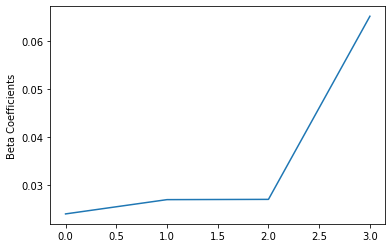

In [45]:
plt.plot(np.sort(logistic_regression_model.coefficients))
plt.ylabel('Beta Coefficients')
plt.show()

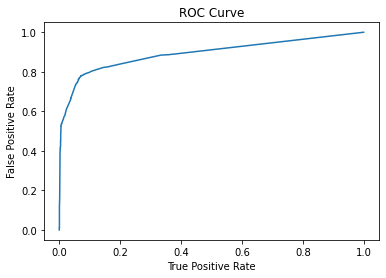

Training set areaUnderROC: 0.8925291949803789


In [46]:
trainingSummary = logistic_regression_model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [47]:
predictions = logistic_regression_model.transform(test)
predictions.select('userID', 'trackID', 'label', 'probability', 
                   'rawPrediction', 'prediction' ).show(12)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|200031| 130183|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200065| 196286|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200070| 271459|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200085| 134106|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200099|  85375|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200118| 240379|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200124| 284066|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200168| 226576|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200191| 156250|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200191| 165227|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200193| 129

In [48]:
from pyspark.sql.functions import col
sort_predictions = predictions.select('userID', 'trackID', 
                                      'label', 'probability', 
                                      'rawPrediction', 'prediction' 
                                     ).sort(col("userID").asc(), col("probability").desc())
sort_predictions.show(6)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|200031| 130183|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200055|  56695|  1.0|[0.00408267560860...|[-5.4969116865961...|       1.0|
|200065| 196286|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200070| 271459|  0.0|[0.82373363591010...|[1.54185093697727...|       0.0|
|200070| 191512|  1.0|[0.00809121208384...|[-4.8088526105944...|       1.0|
|200074| 289311|  1.0|[0.82373363591010...|[1.54185093697727...|       0.0|
+------+-------+-----+--------------------+--------------------+----------+
only showing top 6 rows



In [49]:
logistic_regression_model = logistic_regression.fit(df) # training on full dataset
predictions_lr = logistic_regression_model.transform(all_data_df)
predictions_lr.show(10)
logistic_regression_pred = predictions_lr.select('UserID','trackID','prediction', 'weighted_score')
logistic_regression_pred = logistic_regression_pred.toPandas()

logistic_regression_pred = logistic_regression_pred.sort_values(by = ['UserID', 'prediction', 'weighted_score'], ascending = [True, False, False])
users = logistic_regression_pred['UserID'].unique()
temp_df = pd.DataFrame()
for userId in users:
    frame_to_update = logistic_regression_pred.loc[logistic_regression_pred['UserID'] == userId]
    frame_to_update.head(3)['prediction'] = 1.0
    frame_to_update.tail(3)['prediction'] = 0.0
    temp_df = temp_df.append(frame_to_update, ignore_index = True)
logistic_regression_pred = temp_df
logistic_regression_pred.head(10)

+--------------------+------+-------+-----+------+------------------+-------------------+--------------------+--------------------+----------+
|            features|userID|trackID|album|artist|        genre_mean|     weighted_score|       rawPrediction|         probability|prediction|
+--------------------+------+-------+-----+------+------------------+-------------------+--------------------+--------------------+----------+
|           (4,[],[])|199810| 208019|  0.0|   0.0|               0.0|                0.0|[1.53763761328142...|[0.82312104124756...|       0.0|
|[0.0,0.0,3.809523...|199810|  74139|  0.0|   0.0|3.8095238095238093|0.19047619047619047|[1.32211651799568...|[0.78953362443592...|       0.0|
|           (4,[],[])|199810|   9903|  0.0|   0.0|               0.0|                0.0|[1.53763761328142...|[0.82312104124756...|       0.0|
|           (4,[],[])|199810| 242681|  0.0|   0.0|               0.0|                0.0|[1.53763761328142...|[0.82312104124756...|       0.0|

,UserID,trackID,prediction,weighted_score
0,199810,105760,1.0,13.880952
1,199810,18515,1.0,10.500000
2,199810,74139,1.0,0.190476
3,199810,208019,0.0,0.000000
4,199810,9903,0.0,0.000000
5,199810,242681,0.0,0.000000
6,199812,142408,1.0,100.380952
7,199812,130023,1.0,100.380952
8,199812,223706,1.0,15.190476
9,199812,29189,0.0,0.190476


In [50]:
logistic_regression_pred['TrackID'] = logistic_regression_pred['UserID'].astype(str) + '_' + logistic_regression_pred['trackID'].astype(str)
logistic_regression_pred = logistic_regression_pred.rename(columns={'prediction':'Predictor'})
logistic_regression_pred.drop(columns={'UserID', 'trackID', 'weighted_score'}, inplace=True)
logistic_regression_pred.to_csv('./kaggle_submissions/logistic_regression_pred.csv', index=False)
logistic_regression_pred

,Predictor,TrackID
0,1.0,199810_105760
1,1.0,199810_18515
2,1.0,199810_74139
3,0.0,199810_208019
4,0.0,199810_9903
...,...,...
119995,1.0,249010_186634
119996,1.0,249010_262811
119997,0.0,249010_72192
119998,0.0,249010_86104


#####  3.2. Decision Tree Classifier

In [51]:
from pyspark.ml.classification import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(featuresCol='features', labelCol='label', maxDepth=3)
decision_tree_classifier_model = decision_tree_classifier.fit(train)
predictions_decision_tree_classifier = decision_tree_classifier_model.transform(test)

In [52]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_decision_tree_classifier, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8663015950727423


In [53]:
sort_predictions_decision_tree_classifier = predictions_decision_tree_classifier.select('userID', 'trackID', 'label', 'probability', 'rawPrediction', 'prediction').sort(col('userID').asc(), col('probability').desc())
sort_predictions_decision_tree_classifier.show(6)

+------+-------+-----+--------------------+--------------+----------+
|userID|trackID|label|         probability| rawPrediction|prediction|
+------+-------+-----+--------------------+--------------+----------+
|200031| 130183|  0.0|[0.81004767143381...|[2209.0,518.0]|       0.0|
|200055|  56695|  1.0|[0.01466275659824...| [20.0,1344.0]|       1.0|
|200065| 196286|  0.0|[0.81004767143381...|[2209.0,518.0]|       0.0|
|200070| 271459|  0.0|[0.81004767143381...|[2209.0,518.0]|       0.0|
|200070| 191512|  1.0|[0.01466275659824...| [20.0,1344.0]|       1.0|
|200074| 289311|  1.0|[0.81004767143381...|[2209.0,518.0]|       0.0|
+------+-------+-----+--------------------+--------------+----------+
only showing top 6 rows



In [54]:
decision_tree_classifier_model = decision_tree_classifier.fit(df) # training on full dataset
predictions_dt = decision_tree_classifier_model.transform(all_data_df)
predictions_dt.show(10)
decision_tree_pred = predictions_dt.select('UserID','trackID','prediction', 'weighted_score')
decision_tree_pred = decision_tree_pred.toPandas()

decision_tree_pred = decision_tree_pred.sort_values(by = ['UserID', 'prediction', 'weighted_score'], ascending = [True, False, False])
users = decision_tree_pred['UserID'].unique()
temp_df = pd.DataFrame()
for userId in users:
    frame_to_update = decision_tree_pred.loc[decision_tree_pred['UserID'] == userId]
    frame_to_update.head(3)['prediction'] = 1.0
    frame_to_update.tail(3)['prediction'] = 0.0
    temp_df = temp_df.append(frame_to_update, ignore_index = True)
decision_tree_pred = temp_df
decision_tree_pred.head(10)

+--------------------+------+-------+-----+------+------------------+-------------------+--------------+--------------------+----------+
|            features|userID|trackID|album|artist|        genre_mean|     weighted_score| rawPrediction|         probability|prediction|
+--------------------+------+-------+-----+------+------------------+-------------------+--------------+--------------------+----------+
|           (4,[],[])|199810| 208019|  0.0|   0.0|               0.0|                0.0|[2772.0,647.0]|[0.81076338110558...|       0.0|
|[0.0,0.0,3.809523...|199810|  74139|  0.0|   0.0|3.8095238095238093|0.19047619047619047|[2772.0,647.0]|[0.81076338110558...|       0.0|
|           (4,[],[])|199810|   9903|  0.0|   0.0|               0.0|                0.0|[2772.0,647.0]|[0.81076338110558...|       0.0|
|           (4,[],[])|199810| 242681|  0.0|   0.0|               0.0|                0.0|[2772.0,647.0]|[0.81076338110558...|       0.0|
| [0.0,70.0,0.0,10.5]|199810|  18515|  0.

,UserID,trackID,prediction,weighted_score
0,199810,105760,1.0,13.880952
1,199810,18515,1.0,10.500000
2,199810,74139,1.0,0.190476
3,199810,208019,0.0,0.000000
4,199810,9903,0.0,0.000000
5,199810,242681,0.0,0.000000
6,199812,142408,1.0,100.380952
7,199812,130023,1.0,100.380952
8,199812,223706,1.0,15.190476
9,199812,29189,0.0,0.190476


In [55]:
decision_tree_pred['TrackID'] = decision_tree_pred['UserID'].astype(str) + '_' + decision_tree_pred['trackID'].astype(str)
decision_tree_pred = decision_tree_pred.rename(columns={'prediction':'Predictor'})
decision_tree_pred.drop(columns={'UserID', 'trackID', 'weighted_score'}, inplace=True)
decision_tree_pred.to_csv('./kaggle_submissions/decision_tree_pred.csv', index=False)
decision_tree_pred

,Predictor,TrackID
0,1.0,199810_105760
1,1.0,199810_18515
2,1.0,199810_74139
3,0.0,199810_208019
4,0.0,199810_9903
...,...,...
119995,1.0,249010_186634
119996,1.0,249010_262811
119997,0.0,249010_72192
119998,0.0,249010_86104


#####  3.3. Random Forest Classifier

In [56]:
from pyspark.ml.classification import RandomForestClassifier
random_forest = RandomForestClassifier(featuresCol='features', labelCol='label')
random_forest_model = random_forest.fit(train)
random_forest_predictions = random_forest_model.transform(test)

In [57]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(random_forest_predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.89074597907487


In [58]:
sort_random_forest_predictions = random_forest_predictions.select('userID', 'trackID', 'label', 'probability', 'rawPrediction', 'prediction').sort(col('userID').asc(), col('probability').desc())
sort_random_forest_predictions.show(6)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|200031| 130183|  0.0|[0.82786153773756...|[16.5572307547513...|       0.0|
|200055|  56695|  1.0|[0.02112065854904...|[0.42241317098082...|       1.0|
|200065| 196286|  0.0|[0.82786153773756...|[16.5572307547513...|       0.0|
|200070| 271459|  0.0|[0.82786153773756...|[16.5572307547513...|       0.0|
|200070| 191512|  1.0|[0.02112065854904...|[0.42241317098082...|       1.0|
|200074| 289311|  1.0|[0.82786153773756...|[16.5572307547513...|       0.0|
+------+-------+-----+--------------------+--------------------+----------+
only showing top 6 rows



In [59]:
random_forest_model = random_forest.fit(df) # training on full dataset
predictions_rt = random_forest_model.transform(all_data_df)
predictions_rt.show(10)
random_forest_pred = predictions_rt.select('UserID','trackID','prediction', 'weighted_score')
random_forest_pred = random_forest_pred.toPandas()

random_forest_pred = random_forest_pred.sort_values(by = ['UserID', 'prediction', 'weighted_score'], ascending = [True, False, False])
users = random_forest_pred['UserID'].unique()
temp_df = pd.DataFrame()
for userId in users:
    frame_to_update = random_forest_pred.loc[random_forest_pred['UserID'] == userId]
    frame_to_update.head(3)['prediction'] = 1.0
    frame_to_update.tail(3)['prediction'] = 0.0
    temp_df = temp_df.append(frame_to_update, ignore_index = True)
random_forest_pred = temp_df
random_forest_pred.head(10)

+--------------------+------+-------+-----+------+------------------+-------------------+--------------------+--------------------+----------+
|            features|userID|trackID|album|artist|        genre_mean|     weighted_score|       rawPrediction|         probability|prediction|
+--------------------+------+-------+-----+------+------------------+-------------------+--------------------+--------------------+----------+
|           (4,[],[])|199810| 208019|  0.0|   0.0|               0.0|                0.0|[16.5956619943036...|[0.82978309971518...|       0.0|
|[0.0,0.0,3.809523...|199810|  74139|  0.0|   0.0|3.8095238095238093|0.19047619047619047|[15.5961156473121...|[0.77980578236560...|       0.0|
|           (4,[],[])|199810|   9903|  0.0|   0.0|               0.0|                0.0|[16.5956619943036...|[0.82978309971518...|       0.0|
|           (4,[],[])|199810| 242681|  0.0|   0.0|               0.0|                0.0|[16.5956619943036...|[0.82978309971518...|       0.0|

,UserID,trackID,prediction,weighted_score
0,199810,105760,1.0,13.880952
1,199810,18515,1.0,10.500000
2,199810,74139,1.0,0.190476
3,199810,208019,0.0,0.000000
4,199810,9903,0.0,0.000000
5,199810,242681,0.0,0.000000
6,199812,142408,1.0,100.380952
7,199812,130023,1.0,100.380952
8,199812,223706,1.0,15.190476
9,199812,29189,0.0,0.190476


In [60]:
random_forest_pred['TrackID'] = random_forest_pred['UserID'].astype(str) + '_' + random_forest_pred['trackID'].astype(str)
random_forest_pred = random_forest_pred.rename(columns={'prediction':'Predictor'})
random_forest_pred.drop(columns={'UserID', 'trackID', 'weighted_score'}, inplace=True)
random_forest_pred.to_csv('./kaggle_submissions/random_forest_pred.csv', index=False)
random_forest_pred

,Predictor,TrackID
0,1.0,199810_105760
1,1.0,199810_18515
2,1.0,199810_74139
3,0.0,199810_208019
4,0.0,199810_9903
...,...,...
119995,1.0,249010_186634
119996,1.0,249010_262811
119997,0.0,249010_72192
119998,0.0,249010_86104


##### 6.4. Gradient Boosted Tree Classifier

In [61]:
from pyspark.ml.classification import GBTClassifier
gbt_classifier = GBTClassifier(maxIter=100)
gbt_classifier_model = gbt_classifier.fit(train)
gradient_boosted_tree_classifier_predictions = gbt_classifier_model.transform(test)

In [62]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(gradient_boosted_tree_classifier_predictions, {evaluator.metricName: "areaUnderROC"})))


Test Area Under ROC: 0.8856612691677697


In [63]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder().addGrid(gbt_classifier.maxDepth, [2, 4, 6])
.addGrid(gbt_classifier.maxBins, [20, 60])
.addGrid(gbt_classifier.maxIter, [10, 20])
.build())
cv = CrossValidator(estimator=gbt_classifier, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

0.8886712965481393

In [64]:
sort_gradient_boosted_tree_classifier_predictions = gradient_boosted_tree_classifier_predictions.select('userID', 'trackID', 'label', 'probability', 'rawPrediction', 'prediction').sort(col('userID').asc(), col('probability').desc())
sort_gradient_boosted_tree_classifier_predictions.show(6)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|200031| 130183|  0.0|[0.84766060277950...|[0.85818470748660...|       0.0|
|200055|  56695|  1.0|[0.01455992923319...|[-2.1074075656759...|       1.0|
|200065| 196286|  0.0|[0.84766060277950...|[0.85818470748660...|       0.0|
|200070| 271459|  0.0|[0.84766060277950...|[0.85818470748660...|       0.0|
|200070| 191512|  1.0|[0.01227010263492...|[-2.1941218268730...|       1.0|
|200074| 289311|  1.0|[0.84766060277950...|[0.85818470748660...|       0.0|
+------+-------+-----+--------------------+--------------------+----------+
only showing top 6 rows



In [65]:
gradient_boosted_tree_classifier_model = cv.fit(df) # training on full dataset
predictions_gb = gradient_boosted_tree_classifier_model.transform(all_data_df)
predictions_gb.show(10)
gbc_pred = predictions_gb.select('UserID','trackID','prediction', 'weighted_score')
gbc_pred = gbc_pred.toPandas()

gbc_pred = gbc_pred.sort_values(by = ['UserID', 'prediction', 'weighted_score'], ascending = [True, False, False])
users = gbc_pred['UserID'].unique()
temp_df = pd.DataFrame()
for userId in users:
    frame_to_update = gbc_pred.loc[gbc_pred['UserID'] == userId]
    frame_to_update.head(3)['prediction'] = 1.0
    frame_to_update.tail(3)['prediction'] = 0.0
    temp_df = temp_df.append(frame_to_update, ignore_index = True)
gbc_pred = temp_df
gbc_pred.head(10)

+--------------------+------+-------+-----+------+------------------+-------------------+--------------------+--------------------+----------+
|            features|userID|trackID|album|artist|        genre_mean|     weighted_score|       rawPrediction|         probability|prediction|
+--------------------+------+-------+-----+------+------------------+-------------------+--------------------+--------------------+----------+
|           (4,[],[])|199810| 208019|  0.0|   0.0|               0.0|                0.0|[0.83199832054350...|[0.84077377530614...|       0.0|
|[0.0,0.0,3.809523...|199810|  74139|  0.0|   0.0|3.8095238095238093|0.19047619047619047|[0.53240887351295...|[0.74361014602286...|       0.0|
|           (4,[],[])|199810|   9903|  0.0|   0.0|               0.0|                0.0|[0.83199832054350...|[0.84077377530614...|       0.0|
|           (4,[],[])|199810| 242681|  0.0|   0.0|               0.0|                0.0|[0.83199832054350...|[0.84077377530614...|       0.0|

,UserID,trackID,prediction,weighted_score
0,199810,105760,1.0,13.880952
1,199810,18515,1.0,10.500000
2,199810,74139,1.0,0.190476
3,199810,208019,0.0,0.000000
4,199810,9903,0.0,0.000000
5,199810,242681,0.0,0.000000
6,199812,142408,1.0,100.380952
7,199812,130023,1.0,100.380952
8,199812,223706,1.0,15.190476
9,199812,29189,0.0,0.190476


In [66]:
gbc_pred['TrackID'] = gbc_pred['UserID'].astype(str) + '_' + gbc_pred['trackID'].astype(str)
gbc_pred = gbc_pred.rename(columns={'prediction':'Predictor'})
gbc_pred.drop(columns={'UserID', 'trackID', 'weighted_score'}, inplace=True)
gbc_pred.to_csv('./kaggle_submissions/gbc_pred.csv', index=False)
gbc_pred

,Predictor,TrackID
0,1.0,199810_105760
1,1.0,199810_18515
2,1.0,199810_74139
3,0.0,199810_208019
4,0.0,199810_9903
...,...,...
119995,1.0,249010_186634
119996,1.0,249010_262811
119997,0.0,249010_72192
119998,0.0,249010_86104


### Method 4: Ensemble

Linear Ensembling optimized linear combination of all the predictions to approximate the ground truth solution. The equation is given by:<br><br>

<center>$a_{LS} = (S^{T}S)^{-1}S^{T}x$</center>

Then these weights are applied to submissions and sum them. We get an ensembled solution by assigning predictions to the top and bottom three tracks in every six elements.

In [67]:
import pandas as pd
import numpy as np
import os
import csv
import warnings
warnings.filterwarnings("ignore")

In [68]:
S = []
P = []

files = []
with open('Score.csv', newline='') as csvfile:
    scoreFile = csv.reader(csvfile, delimiter=',')
    next(scoreFile)
    for line in scoreFile:
        files.append(str(line[0]))
        P.append(float(line[1]))

P #scores

[0.87683,
 0.85731,
 0.86977,
 0.87677,
 0.61088,
 0.87022,
 0.8705,
 0.81215,
 0.84338,
 0.84291]

The submission folder contains all submitted files, and all data frames will be appended to the S array.

In [69]:
dir = './kaggle_submissions/'
subs = pd.DataFrame()

for filename in files:
    filename = dir + filename
    data = pd.read_csv(filename)
    data['Predictor'] = data['Predictor'].astype(np.int64)
    data = data.sort_values(by = ['TrackID'], ascending = [True])
    S.append(data)
    print(filename)
    
S[0].head()

./kaggle_submissions/random_forest_pred.csv
./kaggle_submissions/decision_tree_pred.csv
./kaggle_submissions/logistic_regression_pred.csv
./kaggle_submissions/gbc_pred.csv
./kaggle_submissions/Predictions_matrix.csv
./kaggle_submissions/Predictions_gsum_mean81505.csv
./kaggle_submissions/Predictions_gmean_sum81505.csv
./kaggle_submissions/Predictions_max.csv
./kaggle_submissions/Predictions_mean.csv
./kaggle_submissions/Predictions_sum.csv


,Predictor,TrackID
0,1,199810_105760
1,1,199810_18515
3,0,199810_208019
5,0,199810_242681
2,1,199810_74139


In [70]:
# Drop TrackID
# renaming Predictor to s[n]
for i in range(len(S)):
    S[i].drop(columns='TrackID', inplace=True)
    S[i].rename(columns={"Predictor":"s"+str(i+1)}, inplace=True)

S[0].head()

,s1
0,1
1,1
3,0
5,0
2,1


The zeros must be replaced with -1's as to avoid decrepencies in the element-by-element multiplications.

In [71]:
for i in range(len(S)):
    S[i]['s'+str(i+1)] = 2.0*S[i]['s'+str(i+1)] - 1.0
S[0].head()

,s1
0,1.0
1,1.0
3,-1.0
5,-1.0
2,1.0


### S matrix

In [72]:
s_matrix = pd.concat(S, axis=1)
s_matrix.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [73]:
s_matrix.shape

(120000, 10)

In [74]:
sT_x = np.zeros((s_matrix.shape[1],1))

### $(S^{T}S)^{-1}$
### $S^{T}x = N(2P_{i}-1)$

In [75]:
N = s_matrix.shape[0]
for i in range(len(sT_x)):
    sT_x[i] = N*((2.0*P[i]) - 1.0)

s_matrix = s_matrix.to_numpy()
ST_S = np.dot(s_matrix.T, s_matrix).astype('float') + np.eye(s_matrix .shape[1]) * (10 ** -6)
ST_S_inv = np.linalg.inv(ST_S)
ST_S_inv

array([[ 8.75000276e+05, -1.25006661e+05, -1.25001204e+05,
        -1.24998779e+05,  1.11094388e-07, -1.24998072e+05,
         0.00000000e+00, -1.24997853e+05, -1.24998965e+05,
        -1.24998742e+05],
       [-1.25006661e+05,  8.75000276e+05, -1.25001204e+05,
        -1.24998779e+05,  1.11101885e-07, -1.24998072e+05,
         0.00000000e+00, -1.24997853e+05, -1.24998965e+05,
        -1.24998742e+05],
       [-1.25001204e+05, -1.25001204e+05,  8.75003914e+05,
        -1.25000598e+05,  1.11089370e-07, -1.24999891e+05,
         0.00000000e+00, -1.24999672e+05, -1.25000784e+05,
        -1.25000561e+05],
       [-1.24997971e+05, -1.24997971e+05, -1.24999789e+05,
         8.75009573e+05,  1.11093043e-07, -1.25003124e+05,
         0.00000000e+00, -1.25002906e+05, -1.25004018e+05,
        -1.25003795e+05],
       [ 1.11092013e-07,  1.11099510e-07,  1.11086995e-07,
         1.11084839e-07,  8.42706946e-06,  1.11102593e-07,
         0.00000000e+00,  1.11102399e-07,  1.11103387e-07,
         1.

Least square vector is caculated by taking the dot product of ST_S_inv and sT_x matricies.

In [76]:
als = np.dot(ST_S_inv, sT_x)
als

array([[ 4.95897830e+09],
       [ 2.74145795e+08],
       [ 3.26460462e+09],
       [ 4.94470321e+09],
       [ 3.00226895e-01],
       [ 3.37265155e+09],
       [ 7.41000000e-01],
       [-1.05642456e+10],
       [-3.06902139e+09],
       [-3.18181650e+09]])

The weights applied to the S_matrix.
 $S_{ensembled}$ 

In [77]:
s_ensemble = np.matmul(s_matrix, als)
s_ensemble

array([[ 0.30326843],
       [ 0.30326843],
       [ 0.30326843],
       ...,
       [-1.78526878],
       [-1.78526878],
       [-1.78526878]])

In [78]:
s_ensemble[0:6][::-1].sort()

In [79]:
pred = pd.read_csv('./kaggle_submissions/Predictions_mean.csv')
for i in range(len(pred)):
    pred['Predictor'][i] = s_ensemble[i]
pred.head()

,TrackID,Predictor
0,199810_105760,0
1,199810_74139,0
2,199810_18515,0
3,199810_208019,-1
4,199810_9903,-1


In [80]:
start=0
end=6
while end <=120000:
    pred['Predictor'][pred['Predictor'][start:end].nlargest(3).index[0:3]] = 1.0
    start=end
    end +=6
    
for i in range(len(pred)):
    if pred['Predictor'][i] != 1.0:
        pred['Predictor'][i] = 0.0
        
pred['Predictor'] = np.int64(pred['Predictor'])

In [81]:
pred.head(12)

,TrackID,Predictor
0,199810_105760,1
1,199810_74139,1
2,199810_18515,1
3,199810_208019,0
4,199810_9903,0
5,199810_242681,0
6,199812_142408,1
7,199812_130023,1
8,199812_223706,1
9,199812_29189,0


In [82]:
pred.tail(12)

,TrackID,Predictor
119988,249008_164591,1
119989,249008_165413,1
119990,249008_239621,1
119991,249008_4967,0
119992,249008_127497,0
119993,249008_197975,0
119994,249010_110470,1
119995,249010_186634,1
119996,249010_262811,1
119997,249010_72192,0


In [83]:
pred['Predictor'].value_counts()

1    60000
0    60000
Name: Predictor, dtype: int64

In [84]:
pred.head()

,TrackID,Predictor
0,199810_105760,1
1,199810_74139,1
2,199810_18515,1
3,199810_208019,0
4,199810_9903,0


In [85]:
pred.to_csv('./kaggle_submissions/ensemble_final.csv', index=False)